# 002《Python数据结构与算法分析》
---  

## 1 章节安排  

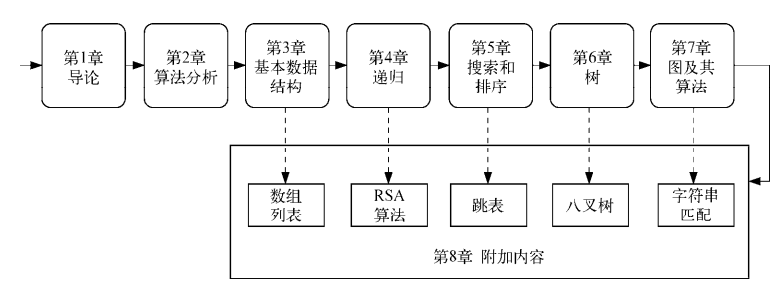

## 2 算法复杂度

- 时间复杂度

In [8]:
import time

def sumOfN1(N:int)->(int, float):
    '''sum of N with range optimal by Python'''
    start = time.time()
    total = 0
    for num in range(1, N + 1):
        total += num
    stop = time.time()
    timeWindow = stop - start
    return total, timeWindow

def sumOfN2(N:int)->(int, float):
    '''sum of N with while loop'''
    start = time.time()
    total = 0
    while N != 0:
        total += N
        N -= 1
    stop = time.time()
    timeWindow = stop - start
    return total, timeWindow

def sumOfN3(N:int)->(int, float):
    ''''用公式'''
    start = time.time()
    total = 0
    total = (N*(N-1))/2
    stop = time.time()
    timeWindow = stop - start
    return total, timeWindow

# 计算耗时 方案一：
%time print('sumOfN1:', sumOfN1(10000000), '\n') # 效率更高，因为range本身就是优化过的
%time print('sumOfN2:', sumOfN2(10000000), '\n') # while loop越来越慢
%time print('sumOfN3:', sumOfN3(10000000), '\n') # 效率最高
print('-'*100)

# 计算耗时 方案二：
import timeit
# t1 = timeit.Timer('sumOfN(1000)', 'from __main__ import sumOfN')
# print('timeit计算耗时：', t1.timeit(1))
print(f'timeit计算耗时：', timeit.Timer('sumOfN3(1000)', 'from __main__ import sumOfN3').timeit(100)) # 重复执行sumOfN1 100次所用时间

# 计算耗时 方案三：
# 装饰器

sumOfN1: (50000005000000, 0.5485100746154785) 

CPU times: total: 359 ms
Wall time: 549 ms
sumOfN2: (50000005000000, 0.7468597888946533) 

CPU times: total: 672 ms
Wall time: 747 ms
sumOfN3: (49999995000000.0, 0.0) 

CPU times: total: 0 ns
Wall time: 0 ns
----------------------------------------------------------------------------------------------------
timeit计算耗时： 4.090000584255904e-05


- 空间复杂度

## 栈

## 队列

## 递归

### 递归算法效率

In [1]:
import time
from functools import wraps

def timer(func):
    '''计时器模块，可以为后续程序多用到；
    此时需要特别注意装饰器的内涵，如果忘记了回头看
    Python学习笔记关于‘闭包’和装饰器不服'''
    @wraps(func) # 保留原函数信息
    def wraper(*args, **kwargs):
        start = time.time()
        sumTotal = func(*args, **kwargs)
        stop = time.time()
        print(f'cost time: {stop - start} seconds')
        return sumTotal
    return wraper


In [ ]:
@timer
def loopSum(N:int)->int:
    '''循环求和函数'''
    total = 0
    for i in range(1, N + 1):
        total += i
    return total

# @timer # 用递归，每次调用都计算一次时间太麻烦了
def recursionSum(numList:list)->list:
    '''递归(recursion)求和函数'''
    if len(numList) == 1:
        return numList[0]
    else:
        return numList[0] + recursionSum(numList[1:])
N = 1000
sumTotal = loopSum(N); print(sumTotal)
print('-'*100)

start = time.time()
sumTotal1 = recursionSum([i for i in range(1, N + 1)]); print(sumTotal1)
stop = time.time()
print('const time:', stop - start)

# 递归的效率更低

### 动态规划

- 青蛙每次跳跃1个或2个台阶，有10阶台阶，青蛙有多少种跳法？

In [1]:
# 递归算法
def JumpSteps_digui(n):
    if n in (1, 2):
        return n
    return JumpSteps_digui(n-1)+JumpSteps_digui(n-2)

print(JumpSteps_digui.__name__, JumpSteps_digui(21))

# 动态规划
def JumpFloor_new(n):
    if n in (1, 2):
        return n
    temp1, temp2 = 1, 2
    while n > 2:
        temp = temp1 + temp2
        temp1, temp2 = temp2, temp
        n -= 1
    return temp

print(JumpFloor_new.__name__, JumpFloor_new(21))

JumpSteps_digui 17711
JumpFloor_new 17711


- 找钱，最小银币数目

In [9]:
def recMC(coinValueList, change):
    minCoins = change
    if change in coinValueList:
        return 1
    else:
        for i in [c for c in coinValueList if c <= change]:
            numCoins = 1 + recMC(coinValueList, change-i)
            if numCoins < minCoins:
                minCoins = numCoins
    return minCoins

print(recMC([1, 5, 10, 25], 63))

6


## 搜索和排序

### 搜索

- Python序列自带搜索（经过优化）

In [10]:
15 in [3, 5, 2, 4, 1]

False

- 顺序搜索 O(n)
  - 有序（可以索引）
  - 随机排列的
- 二分搜索 O(logn)
  - 有序（可以索引）
  - 顺序排列（升序或降序）

In [7]:
@timer
def sequentialSearch(alist, item):
    '''有顺序的数据[例如Python序列的下标等]，按照顺序进行逐个比对，最大复杂度为O(n)'''
    pos = 0
    found = False
    while pos < len(alist) and not found: # 没有到末尾 and 到目前没有搜索到
        if alist[pos] == item:
            found = True
        else:
            pos += 1

    return found

@timer
def binarySearch(alist, item): 
    '''二分搜索：已有列表按照升序或降序排列，然后进行二分，再与查询值比较
    以确定下一次查询的方向（左侧或右侧）'''
    first = 0
    last = len(alist) - 1
    found = False
    while first <= last and not found: # 首位不相等（没有搜索完列表） and 没有查到
        midpoint = (first + last)//2
        if alist[midpoint] == item:
            found = True
        else:
            if item < alist[midpoint]:
                last = midpoint - 1
            else:
                first = midpoint + 1

    return found 

@timer
def isinSearch(alist, item):
    '''用Python自带的列表查询功能进行查找'''
    if item in alist:
        return True
    else:
        return False
    
# alist = ['You', 'are', 'so', 'beautiful']
# item = 'so'
alist = [i for i in range(1, 1000000)]
item = 1000000 - 1

print(sequentialSearch.__name__,sequentialSearch(alist, item), '\n') # 效率低

print(binarySearch.__name__,binarySearch(alist, item), '\n') # 效率高

print(isinSearch.__name__,isinSearch(alist, item), '\n') # 效率中等


cost time: 0.1277327537536621 seconds
sequentialSearch True 

cost time: 0.0 seconds
binarySearch True 

cost time: 0.008098840713500977 seconds
isinSearch True 



### 排序

- 冒泡排序
  - N个数，需N-1轮，每轮两两比较大的数右移，一直到最后，经N-1轮即可完成。
  - range()或while使用
  - 时间复杂度：O(n2)

In [31]:
[i for i in range(5 , 0, -1)]

[5, 4, 3, 2, 1]

In [29]:
@timer
def bubbleSort(alist):
    '''冒泡算法range实现'''
    for passnum in range(len(alist)-1, 0, -1): # N个数，需要N-1轮
        print(alist, f'第{passnum}轮的顺序')

        # “冒泡”：两两比较后较大的数右移
        for i in range(passnum):
            if alist[i] > alist[i + 1]:
                alist[i], alist[i + 1] = alist[i + 1], alist[i] # 较大的数右移："冒泡"
                print(alist)

    return alist

@timer
def whileBubbleSort(alist:list)->list:
    '''冒泡算法while实现'''
    passnum = len(alist) - 1
    while passnum > 0 :
        print(alist, f'第{passnum}轮的顺序')
        for i in range(passnum):
            if alist[i] > alist[i+1]:
                alist[i], alist[i + 1] = alist[i + 1], alist[i] # 较大的数右移："冒泡"
                print(alist)
        passnum = passnum -1

    return alist

# bubbleSort([23, 100, 1, 0, 11])
# # %timeit bubbleSort([23, 100, 1, 0, 11])
# print('-'*100)
# bubbleSort([0, 1, 11, 23, 100])
# print('-'*100)
# bubbleSort([0, 1, 23, 11, 100])

whileBubbleSort([23, 100, 1, 0, 11])
# %timeit bubbleSort([23, 100, 1, 0, 11])
print('-'*100)
whileBubbleSort([0, 1, 11, 23, 100])
print('-'*100)
whileBubbleSort([0, 1, 23, 11, 100])

[23, 100, 1, 0, 11] 第4轮的顺序
[23, 1, 100, 0, 11]
[23, 1, 0, 100, 11]
[23, 1, 0, 11, 100]
[23, 1, 0, 11, 100] 第3轮的顺序
[1, 23, 0, 11, 100]
[1, 0, 23, 11, 100]
[1, 0, 11, 23, 100]
[1, 0, 11, 23, 100] 第2轮的顺序
[0, 1, 11, 23, 100]
[0, 1, 11, 23, 100] 第1轮的顺序
cost time: 0.0 seconds
----------------------------------------------------------------------------------------------------
[0, 1, 11, 23, 100] 第4轮的顺序
[0, 1, 11, 23, 100] 第3轮的顺序
[0, 1, 11, 23, 100] 第2轮的顺序
[0, 1, 11, 23, 100] 第1轮的顺序
cost time: 0.0 seconds
----------------------------------------------------------------------------------------------------
[0, 1, 23, 11, 100] 第4轮的顺序
[0, 1, 11, 23, 100]
[0, 1, 11, 23, 100] 第3轮的顺序
[0, 1, 11, 23, 100] 第2轮的顺序
[0, 1, 11, 23, 100] 第1轮的顺序
cost time: 0.0 seconds


[0, 1, 11, 23, 100]

- 短冒泡排序
  - 遇到排好序的数据自动判断不用交换，较少交换次数提高效率

In [26]:
@timer
def shortBubbleSort(alist:list)->list:
    '''短冒泡算法'''
    exchange = True
    passnum = len(alist) - 1
    while passnum > 0 and exchange:
        print(alist, f'第{passnum}轮的顺序')
        exchange = False # 如果没有alist[i] > alist[i+1]即需要交换的，则exchange一直为False，就结束while了，说明一切排好了
        for i in range(passnum):
            if alist[i] > alist[i+1]:
                exchange = True
                alist[i], alist[i + 1] = alist[i + 1], alist[i] # 较大的数右移："冒泡"
                print(alist)
        passnum = passnum -1

    return alist

shortBubbleSort([23, 100, 1, 0, 11])
print('-'*100)
shortBubbleSort([0, 1, 11, 23, 100])
print('-'*100)
shortBubbleSort([0, 1, 23, 11, 100])

[23, 100, 1, 0, 11] 第4轮的顺序
[23, 1, 100, 0, 11]
[23, 1, 0, 100, 11]
[23, 1, 0, 11, 100]
[23, 1, 0, 11, 100] 第3轮的顺序
[1, 23, 0, 11, 100]
[1, 0, 23, 11, 100]
[1, 0, 11, 23, 100]
[1, 0, 11, 23, 100] 第2轮的顺序
[0, 1, 11, 23, 100]
[0, 1, 11, 23, 100] 第1轮的顺序
cost time: 0.0 seconds
----------------------------------------------------------------------------------------------------
[0, 1, 11, 23, 100] 第4轮的顺序
cost time: 0.0 seconds
----------------------------------------------------------------------------------------------------
[0, 1, 23, 11, 100] 第4轮的顺序
[0, 1, 11, 23, 100]
[0, 1, 11, 23, 100] 第3轮的顺序
cost time: 0.0 seconds


[0, 1, 11, 23, 100]

- 选择排序
  - N个数，需N-1轮排序，每轮找最大的数，然后和最右边数换位置，N-1轮后即可完成。
  - 可以看出，选择排序算法和冒泡排序算法的比较次数相同，所以时间复杂度也是 O(n2) 。但是，由于减少了交换次数，因此选择排序算法通常更快。

In [50]:
@timer
def whileSelectionSort(alist):
    '''选择排序用while实现'''
    passnum = len(alist) - 1
    while passnum > 0:
        print(alist, f'第{passnum}轮的顺序')
        positionOfMax = 0
        for location in range(1, passnum+1):
            if alist[location] > alist[positionOfMax]:
                positionOfMax = location

        alist[passnum], alist[positionOfMax] = alist[positionOfMax], alist[passnum] # 最大的数放最右边："选择"
        print(alist)

        passnum -= 1
    return alist

@timer
def rangeSelectionSort(alist:list)->list:
    '''选择排序用range实现'''
    for passnum in range(len(alist)-1, 1, -1): # N个数，需要经过N-1轮
        print(alist, f'第{passnum}轮的顺序')

        # 找最大的数
        positionOfMax = 0
        for position in range(1, passnum):
            if alist[position] > alist[positionOfMax]:
                positionOfMax = position

        alist[passnum], alist[positionOfMax] = alist[positionOfMax], alist[passnum] # 每一轮取最大的数放最右边："选择"
        print(alist)
    return alist

whileSelectionSort([23, 100, 1, 0, 11])
rangeSelectionSort([23, 100, 1, 0, 11])

[23, 100, 1, 0, 11] 第4轮的顺序
[23, 11, 1, 0, 100]
[23, 11, 1, 0, 100] 第3轮的顺序
[0, 11, 1, 23, 100]
[0, 11, 1, 23, 100] 第2轮的顺序
[0, 1, 11, 23, 100]
[0, 1, 11, 23, 100] 第1轮的顺序
[0, 1, 11, 23, 100]
cost time: 0.0005064010620117188 seconds
[23, 100, 1, 0, 11] 第4轮的顺序
[23, 11, 1, 0, 100]
[23, 11, 1, 0, 100] 第3轮的顺序
[0, 11, 1, 23, 100]
[0, 11, 1, 23, 100] 第2轮的顺序
[0, 1, 11, 23, 100]
cost time: 0.0 seconds


[0, 1, 11, 23, 100]

- 插入排序
  - 插入排序的时间复杂度也是 O(n2) ，但原理稍有不同。

In [51]:
@timer
def insertionSort(alist):
    '''插入排序'''
    for index in range(1, len(alist)): # 开始假设第0个数为“子列表”，range()左闭右开
        print(alist, f'第{index}轮的顺序')

        currentValue = alist[index]
        position = index

        while (position > 0) and (alist[position - 1] > currentValue): # 取currentValue按照从右到左顺序与左侧有序列表每个元素依次比较大小
            alist[position] = alist[position - 1] # 较大的数右移
            position -= 1
            print(alist)

        alist[position] = currentValue
    return alist

insertionSort([23, 100, 1, 0, 11])

[23, 100, 1, 0, 11] 第1轮的顺序
[23, 100, 1, 0, 11] 第2轮的顺序
[23, 100, 100, 0, 11]
[23, 23, 100, 0, 11]
[1, 23, 100, 0, 11] 第3轮的顺序
[1, 23, 100, 100, 11]
[1, 23, 23, 100, 11]
[1, 1, 23, 100, 11]
[0, 1, 23, 100, 11] 第4轮的顺序
[0, 1, 23, 100, 100]
[0, 1, 23, 23, 100]
cost time: 0.0 seconds


[0, 1, 11, 23, 100]

- 希尔排序
  - 时间复杂度为O(n3/2)

- 归并排序
  - O(nlogn)

- 快速排序
  - O(nlogn)

## 树

## 图